In [1]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

import os
import glob
import sys
os.chdir("../data")
sys.path.append('home/sein/ksc_model/data/configs_new_dataset/5')
dir_list = glob.glob('configs_new_dataset/5/*.cnf')
df = pd.read_csv('configs_new_dataset/external_new_dataset/external_results_5.csv')
tplt_df = df[['tps','latency']]

print(tplt_df)

/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


               tps  latency
0      9978.974602      713
1      9700.915358      878
2      9914.215118      729
3     10072.408413      638
4      9966.640708     1038
...            ...      ...
1995  10766.755588      625
1996   8593.107958     1440
1997   8217.998897     1879
1998  11236.779711      626
1999   9502.974280      774

[2000 rows x 2 columns]


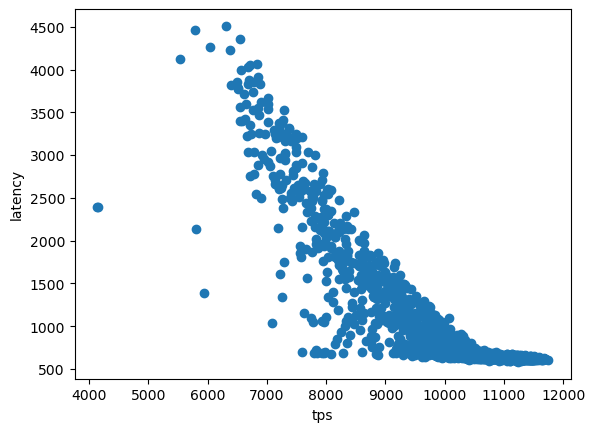

In [2]:
plt.scatter(df['tps'],df['latency'])
plt.xlabel('tps')
plt.ylabel('latency')
plt.show()

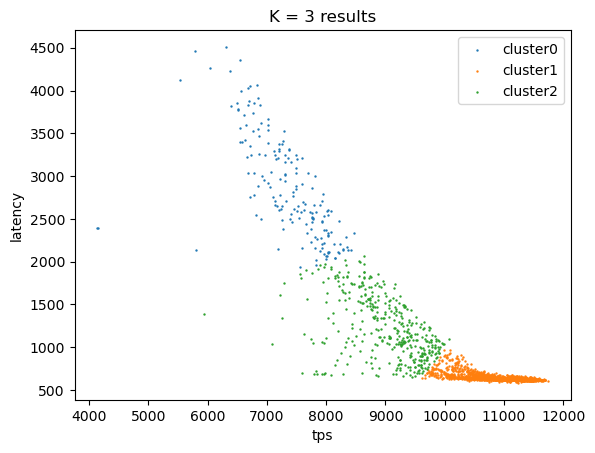

In [13]:
from sklearn.preprocessing import MinMaxScaler

#데이터 전처리 MINMAX
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(tplt_df)

k = 3

model = KMeans(n_clusters = k, random_state = 10)
model.fit(data_scale)
tplt_df['cluster'] = model.fit_predict(data_scale)
tplt_df.to_csv("clustering_new_dataset_5.csv")
# df['cluster'] = model.fit_predict(data_scale)
# df.to_csv("clustering.csv")

for i in range(k):
    plt.scatter(df.loc[tplt_df['cluster'] == i, 'tps'], df.loc[tplt_df['cluster']==i,'latency'], 
                label = 'cluster' + str(i), s = 0.5)
    #size = s = ?

plt.legend()
plt.title('K = %d results'%k)
plt.xlabel('tps')
plt.ylabel('latency')
plt.show()

In [5]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 

#     from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, random_state=10)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

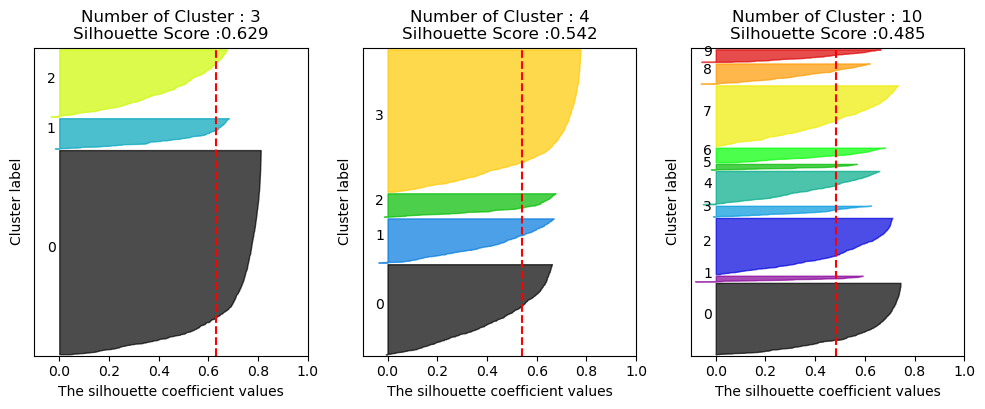

In [7]:
###cluster 개수 확인 - 실루엣 계수
import numpy as np
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([3,4,10], tplt_df)

In [15]:
clus=pd.read_csv("clustering_new_dataset_5.csv", index_col=0)
# one_hot = pd.get_dummies(clus, columns=['cluster'])
# # print(one_hot)
# one_hot
print(clus)
one_hot = pd.get_dummies(clus, columns=['cluster'])
print(one_hot)

               tps  latency  cluster
0      9978.974602      713        1
1      9700.915358      878        2
2      9914.215118      729        1
3     10072.408413      638        1
4      9966.640708     1038        2
...            ...      ...      ...
1995  10766.755588      625        1
1996   8593.107958     1440        2
1997   8217.998897     1879        2
1998  11236.779711      626        1
1999   9502.974280      774        2

[2000 rows x 3 columns]
               tps  latency  cluster_0  cluster_1  cluster_2
0      9978.974602      713          0          1          0
1      9700.915358      878          0          0          1
2      9914.215118      729          0          1          0
3     10072.408413      638          0          1          0
4      9966.640708     1038          0          0          1
...            ...      ...        ...        ...        ...
1995  10766.755588      625          0          1          0
1996   8593.107958     1440          0     

In [17]:
###clustering 이후 원핫벡터

import pandas as pd
import numpy as np
import glob
import torch
from MLP import NeuralModel
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from cluster import make_data
from sklearn.metrics import log_loss
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# def train_Net(logger, data, METRIC, MODE, batch_size, lr, epochs, hidden_dim):
# # # def train_Net(logger, data, METRIC, MODE, batch_size, lr, epochs, hidden_dim, group_dim, Q_NUM, dot, EX_NUM=4, lamb=0.1):

#     df_pred = pd.DataFrame(columns=("METRIC", "r2",  "MSE"))

#     k_r2 = 0
#     # k_MSE = 0
#     cnt = 0


    

    # dir_list = glob.glob('../data/A-1/configs/A-1/*.cnf')
input_data = make_data('../data/configs_new_dataset/5/*.cnf')    
clus=pd.read_csv("../data/clustering_new_dataset_5.csv", index_col=0)
# rfin_array = np.array(fin_list).astype(float)
# input_data = torch.tensor(rfin_array)

# one_hot = pd.get_dummies(clus, columns=['cluster'])

#input_data = data

X = input_data #config 파일
# print(X)
# quit()

# Y = one_hot #one-hot vector 값
# print(Y)

# Y = clus.iloc[:,2:].astype(int)
    
# Y = Y.iloc[:,3:]
# Y.columns = ["cluster_0", "cluster_1", "cluster_2"]
#Y.columns = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
# Y.columns = ["cluster_0", "cluster_1", "cluster_2","cluster_3","cluster_4","cluster_5"]
#print(Y)
Y

,cluster
0,1
1,2
2,1
3,1
4,2
...,...
1995,1
1996,2
1997,2
1998,1


In [ ]:
# cluster_0 = Y["cluster_0"]
# cluster_1 = Y["cluster_1"]
# cluster_2 = Y["cluster_2"]
# cluster_3 = Y["cluster_3"]
# cluster_4 = Y["cluster_4"]


cluster_0 = []
cluster_1 = []
cluster_2 = []
cluster_3 = []
#cluster_4 = []
# cluster_5 = []



for idx, y in enumerate(Y.itertuples()):
   
    if y[1]==1:
        cluster_0.append(X[idx])
    elif y[2]==1:
        cluster_1.append(X[idx])
    elif y[3]==1:
        cluster_2.append(X[idx])
    # elif y[4]==1:
    #     cluster_3.append(X[idx])
    # elif y[5]==1:
    #     cluster_4.append(X[idx])
    # else:
    #    cluster_4.append(X[idx])

    

print("cluster_0:",len(cluster_0))
print("cluster_1:",len(cluster_1))
print("cluster_2:",len(cluster_2))
# print("cluster_3:",len(cluster_3))

print("SUM:", len(cluster_0)+len(cluster_1)+len(cluster_2))
#print("SUM:", len(cluster_0)+len(cluster_1)+len(cluster_2)+len(cluster_3))
# print("cluster_4:",len(cluster_4))
# print(len(cluster_5))





RandomForest

In [88]:
######################################################################수정
import os
import utils
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from cluster import make_data

def KmeanClustering(data, k):
    np_external = external.to_numpy()
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(np_external)
    labels = kmeans.labels_
    
    fig = plt.figure(figsize=(7,7))
    fig.set_facecolor('white')
    for i, label in enumerate(labels):
        if label == 0:
            color = 'navy'
        elif label == 1:
            color = 'tomato'
        elif label == 2:
            color = 'green'
        elif label == 3:
            color = 'orange'
        plt.scatter(np_external[i,0],np_external[i,1], color=color)

    plt.xlabel('tps')
    plt.ylabel('latency')
    plt.show()
    return labels

def get_data(knob_path, external_path, i, num, wk):
    for i in range(10):
        KNOB_PATH = (f'../data/configs_new_dataset/{i}')
        # raw_knobs_list=[]    
        for num in range(2000):
            #raw_knobs_path = os.path.join(KNOB_PATH, f'my_{num}.cnf')
            raw_knobs = make_data(os.path.join(KNOB_PATH, f'my_{num}.cnf'))
            raw_knobs = pd.DataFrame(raw_knobs)
            # raw_knobs_list.append(raw_knobs)
    # input_data = make_data('../data/configs_new_dataset/5/*.cnf')  
        # raw_knobs = os.path.join(KNOB_PATH, f'my_{num}.cnf')
        # raw_knobs = pd.raw_knobs
        # print(10)
        # quit()
    
    #raw_knobs = utils.mysql_knob_dataframe(wk, KNOB_PATH)
    #데이터프레임으로 config 불러옴
    
    #EXTERNAL_PATH = os.path.join('..','data', 'configs_new_dataset', 'external_new_dataset')
    EXTERNAL_PATH=("../data/configs_new_dataset/external_new_dataset/")
    for i in range(10):
        external_ = pd.read_csv(os.path.join(EXTERNAL_PATH, f'external_results_{i}.csv'), index_col=0)
    latency_columns = []
    for col in external_.columns:
        if col.find("latency") == 0 and col != 'latency_max' and col != 'latency_CLEANUP':
            latency_columns.append(col)
    external = external_[['tps']].copy()
    external['latency'] = external_[latency_columns].max(axis=1)
    return raw_knobs, external


In [2]:
#원본
import os
import utils
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from cluster import make_data
import configparser

def mysql_knob_dataframe(wk, knobs_path):
    knobs_path = os.path.join(knobs_path, str(wk))
    config_len = len(os.listdir(knobs_path))
    cnf_parser = configparser.ConfigParser()
    pd_mysql = pd.DataFrame()
    for idx in range(config_len):
        cnf_parser.read(os.path.join(knobs_path, f'my_{idx}.cnf'))
        conf_dict = cnf_parser._sections['mysqld']
        tmp = pd.DataFrame(data=[conf_dict.values()], columns=conf_dict.keys())
        pd_mysql = pd.concat([pd_mysql, tmp])
        
    pd_mysql = pd_mysql.reset_index(drop=True)
    pd_mysql = pd_mysql.drop(columns=['log-error', 'bind-address'])
    return pd_mysql

def KmeanClustering(data, k):
    np_external = external.to_numpy()
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(np_external)
    labels = kmeans.labels_
    
    fig = plt.figure(figsize=(7,7))
    fig.set_facecolor('white')
    for i, label in enumerate(labels):
        if label == 0:
            color = 'navy'
        elif label == 1:
            color = 'tomato'
        elif label == 2:
            color = 'green'
        elif label == 3:
            color = 'orange'
        plt.scatter(np_external[i,0],np_external[i,1], color=color)

    plt.xlabel('tps')
    plt.ylabel('latency')
    plt.show()
    return labels

def get_data(knob_path, external_path, wk):
    raw_knobs = mysql_knob_dataframe(wk, knob_path)
    
    
    external_ = pd.read_csv(os.path.join(external_path, f'external_results_{wk}.csv'), index_col=0)
    latency_columns = []
    for col in external_.columns:
        if col.find("latency") == 0 and col != 'latency_max' and col != 'latency_CLEANUP':
            latency_columns.append(col)
    external = external_[['tps']].copy()
    external['latency'] = external_[latency_columns].max(axis=1)
    return raw_knobs, external

def get_class_num(data):
    cls, cnt = np.unique(data, return_counts=True)
    print(f'# of the largest class / # of data = {max(cnt) / sum(cnt)}')
    for _ in range(len(cls)):
        print(f'{cls[_]} : {cnt[_]}')

In [ ]:
# #수정
# def get_data(knob_path, external_path, num, wk):

#     KNOB_PATH = (f'../data/configs_new_dataset/{wk}')
#     # raw_knobs_list=[]    

#     #raw_knobs_path = os.path.join(KNOB_PATH, f'my_{num}.cnf')
#     raw_knobs = make_data(KNOB_PATH)
#     raw_knobs = pd.DataFrame(raw_knobs)
#     print(type(raw_knobs))
#     # raw_knobs_list.append(raw_knobs)
#     # input_data = make_data('../data/configs_new_dataset/5/*.cnf')  
#         # raw_knobs = os.path.join(KNOB_PATH, f'my_{num}.cnf')
#         # raw_knobs = pd.raw_knobs
#         # print(10)
#         # quit()
    
#     #raw_knobs = utils.mysql_knob_dataframe(wk, KNOB_PATH)
#     #데이터프레임으로 config 불러옴
    
#     #EXTERNAL_PATH = os.path.join('..','data', 'configs_new_dataset', 'external_new_dataset')
#     EXTERNAL_PATH=("../data/configs_new_dataset/external_new_dataset/")
#     external_ = pd.read_csv(os.path.join(EXTERNAL_PATH, f'external_results_{wk}.csv'), index_col=0)
#     latency_columns = []
#     for col in external_.columns:
#         if col.find("latency") == 0 and col != 'latency_max' and col != 'latency_CLEANUP':
#             latency_columns.append(col)
#     external = external_[['tps']].copy()
#     external['latency'] = external_[latency_columns].max(axis=1)
#     return raw_knobs, external

In [100]:
# def mysql_knob_dataframe(wk, knobs_path):
#     knobs_path = os.path.join(knobs_path, str(wk))
#     config_len = len(os.listdir(knobs_path))
#     cnf_parser = configparser.ConfigParser()
#     pd_mysql = pd.DataFrame()
#     for idx in range(config_len):
#         cnf_parser.read(os.path.join(knobs_path, f'my_{idx}.cnf'))
#         conf_dict = cnf_parser._sections['mysqld']
#         tmp = pd.DataFrame(data=[conf_dict.values()], columns=conf_dict.keys())
#         pd_mysql = pd.concat([pd_mysql, tmp])
        
#     pd_mysql = pd_mysql.reset_index(drop=True)
#     pd_mysql = pd_mysql.drop(columns=['log-error', 'bind-address'])
#     return pd_mysql

In [ ]:
#############################################################
# for i in range(10):
#         KNOB_PATH = (f'../data/configs_new_dataset/{i}')
#         # print(KNOB_PATH)
#     # input_data = make_data('../data/configs_new_dataset/5/*.cnf')  
#         raw_knobs_list = []
#         for num in range(2000):
#             #raw_knobs = os.path.join(KNOB_PATH, f'my_{num}.cnf')
#             raw_knobs = make_data(os.path.join(KNOB_PATH, f'my_{num}.cnf'))
#             # print(raw_knobs.type)
#             raw_knobs_ = pd.DataFrame(raw_knobs)
#             raw_knobs_list.append(raw_knobs)
#             # raw_knobs = pd.raw_knobs
#             print(raw_knobs_list)
#             # print(raw_knobs_.type)

In [ ]:
#############################################################
# EXTERNAL_PATH=("../data/configs_new_dataset/external_new_dataset/")
# for wk in range(10):
#     external_ = pd.read_csv(os.path.join(EXTERNAL_PATH, f'external_results_{wk}.csv'), index_col=0)
# latency_columns = []
# for col in external_.columns:
#     if col.find("latency") == 0 and col != 'latency_max' and col != 'latency_CLEANUP':
#         latency_columns.append(col)
# external = external_[['tps']].copy()
# external['latency'] = external_[latency_columns].max(axis=1)
# print(external)   

In [2]:
# KNOB_PATH = os.path.join('..','data', 'configs_new_dataset')
# EXTERNAL_PATH = os.path.join('..','data', 'configs_new_dataset', 'external_new_dataset')

K-means Clustering

===================0 workload===================


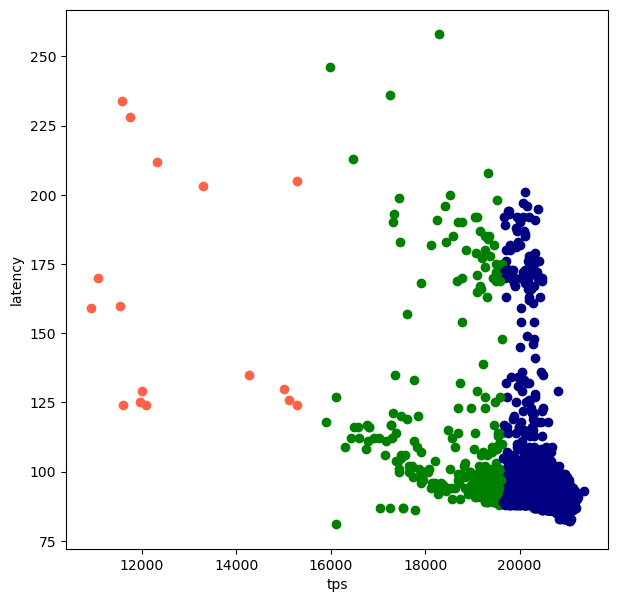

0 : 1688
1 :   16
2 :  296
===================1 workload===================


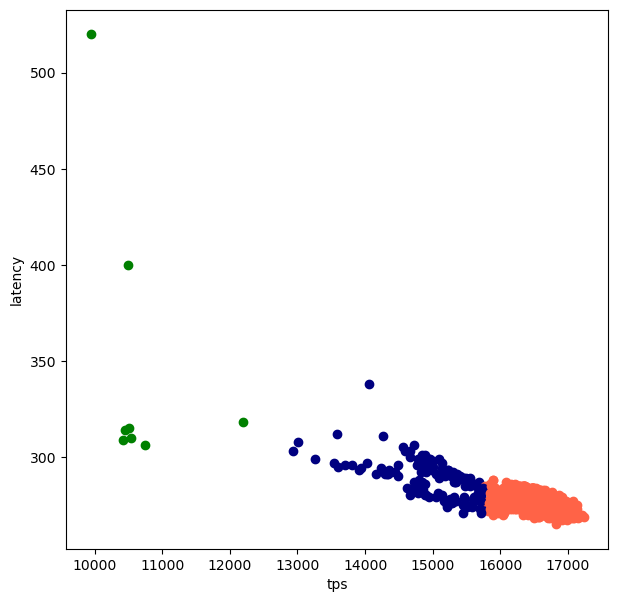

0 :  142
1 : 1850
2 :    8
===================2 workload===================


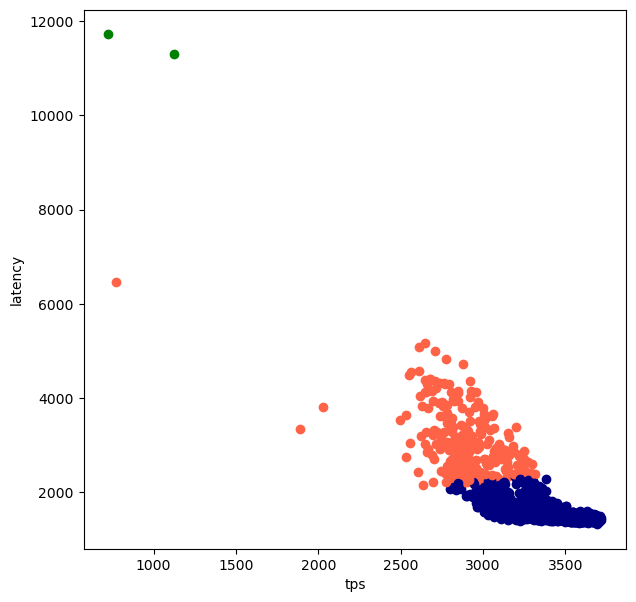

0 : 1771
1 :  227
2 :    2
===================3 workload===================


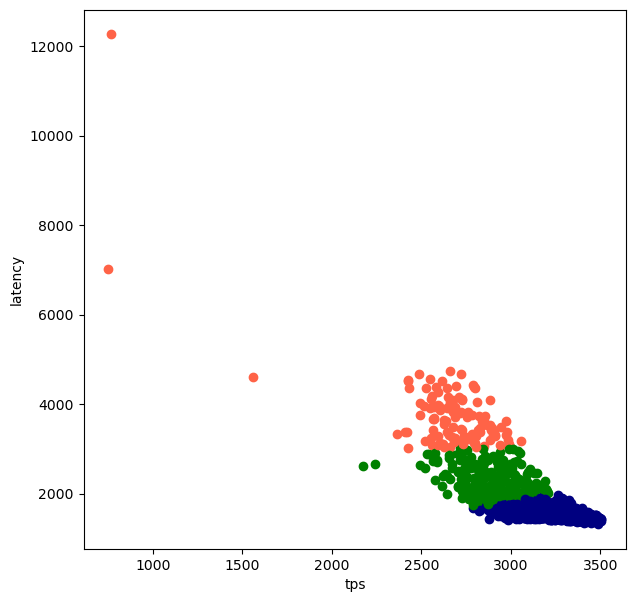

0 : 1634
1 :  115
2 :  251
===================4 workload===================


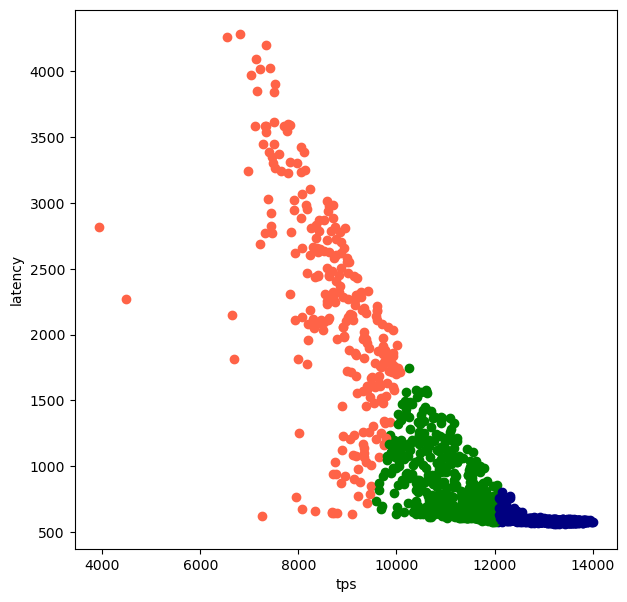

0 : 1198
1 :  266
2 :  536
===================5 workload===================


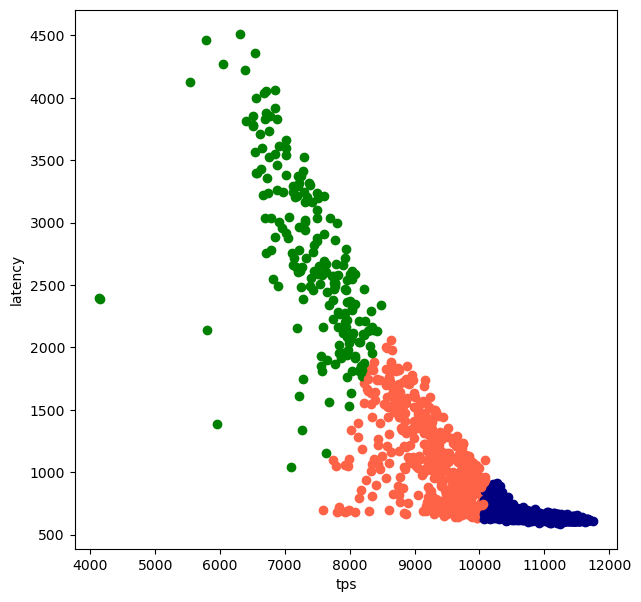

0 : 1353
1 :  446
2 :  201
===================6 workload===================


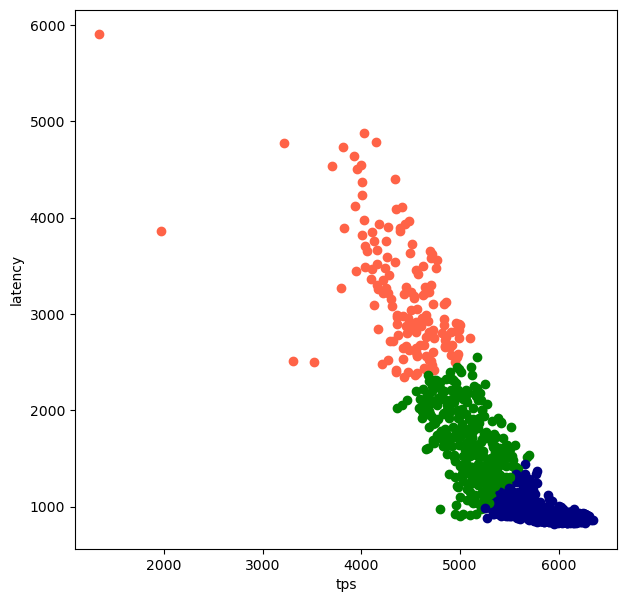

0 : 1503
1 :  151
2 :  346
===================7 workload===================


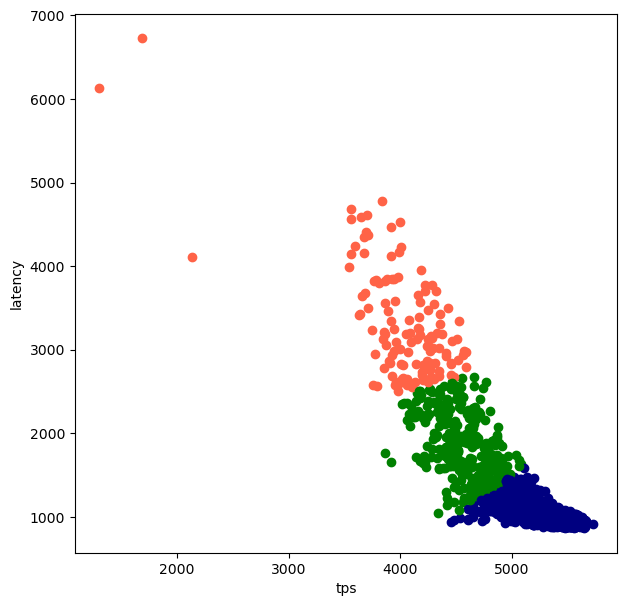

0 : 1554
1 :  130
2 :  316
===================8 workload===================


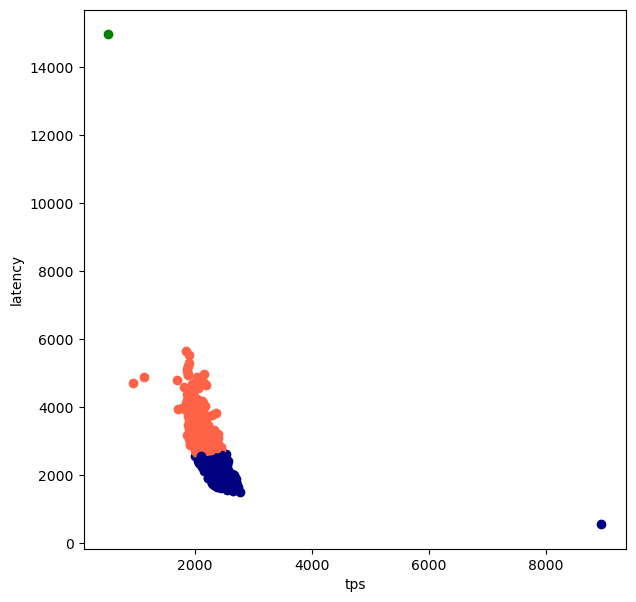

0 : 1792
1 :  207
2 :    1
===================9 workload===================


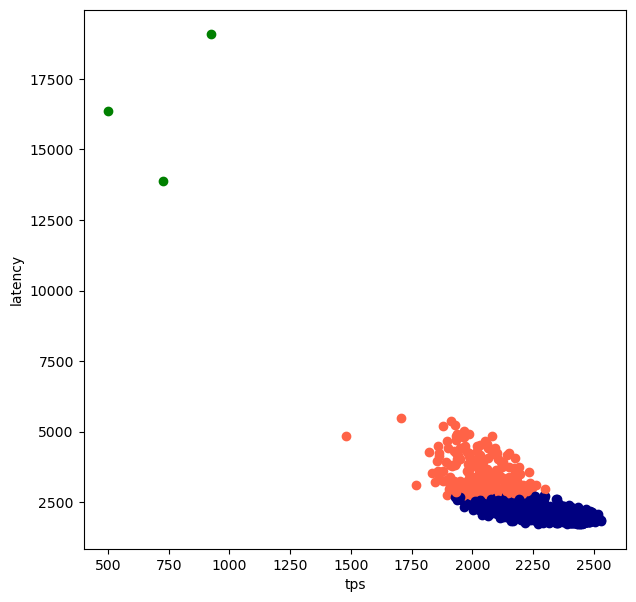

0 : 1787
1 :  210
2 :    3


In [3]:
# import get_data
# import KmeanClustering
KNOB_PATH = ('../data/configs_new_dataset')
EXTERNAL_PATH=("../data/configs_new_dataset/external_new_dataset/")

for wk in range(10):
    print(f'==================={wk} workload===================')
    raw_knobs, external = get_data(KNOB_PATH, EXTERNAL_PATH, wk)
    labels = KmeanClustering(external, 3)
    cls, cnt = np.unique(labels, return_counts=True)
    print(f'{cls[0]} : {cnt[0]:4}\n{cls[1]} : {cnt[1]:4}\n{cls[2]} : {cnt[2]:4}')
    #print(f'score = {davies_bouldin_score(raw_knobs, labels)}')
    print(f'==================================================')

===================0 workload===================


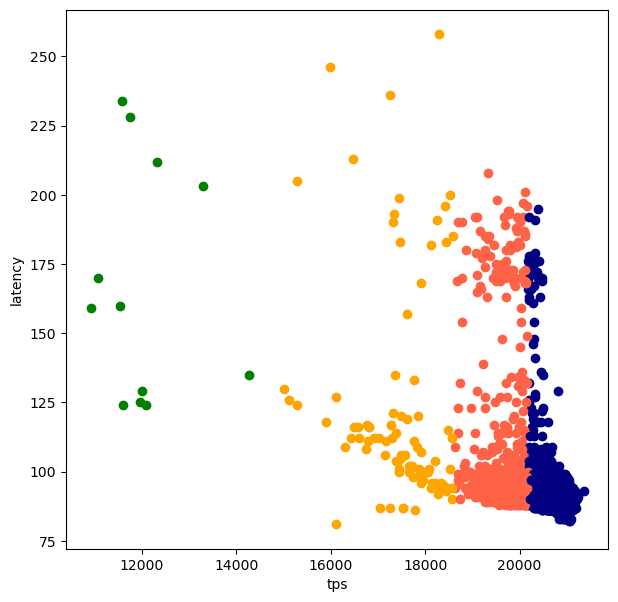

0 : 1301
1 :  594
2 :   12
3 :   93
===================1 workload===================


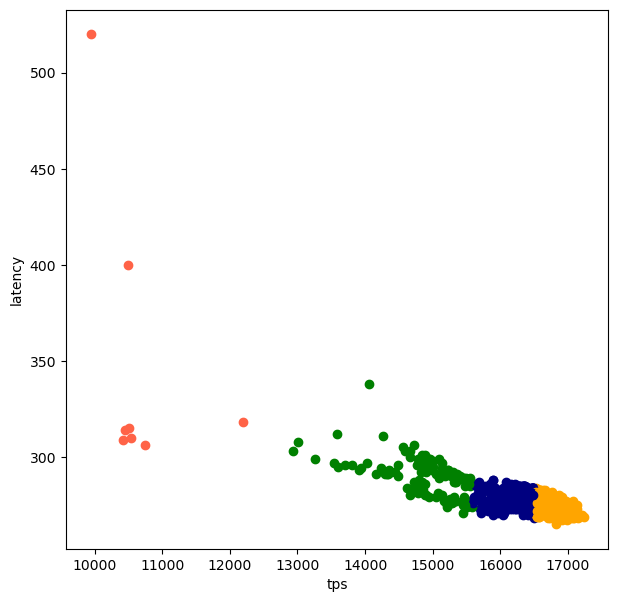

0 :  822
1 :    8
2 :  122
3 : 1048
===================2 workload===================


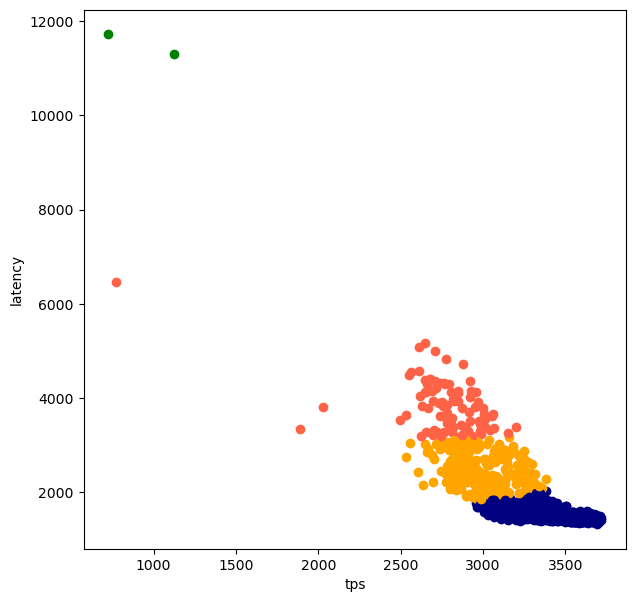

0 : 1691
1 :   91
2 :    2
3 :  216
===================3 workload===================


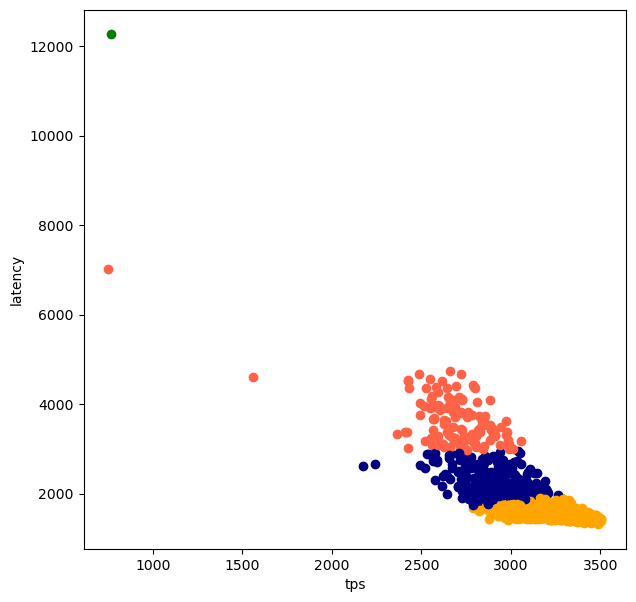

0 :  253
1 :  120
2 :    1
3 : 1626
===================4 workload===================


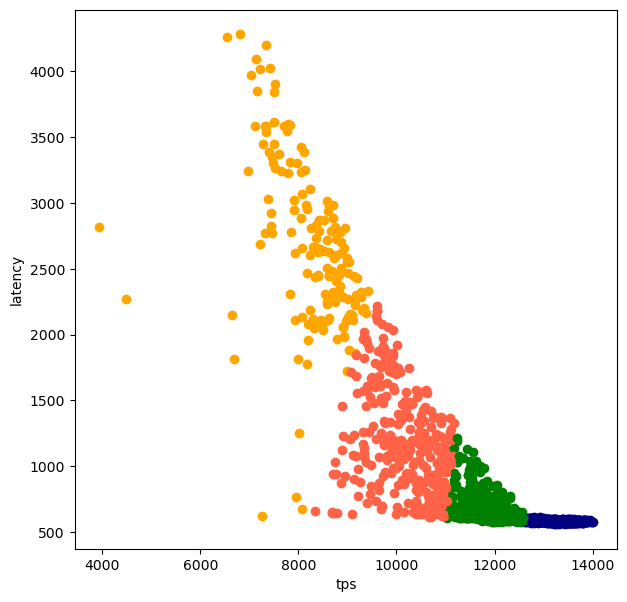

0 :  817
1 :  325
2 :  702
3 :  156
===================5 workload===================


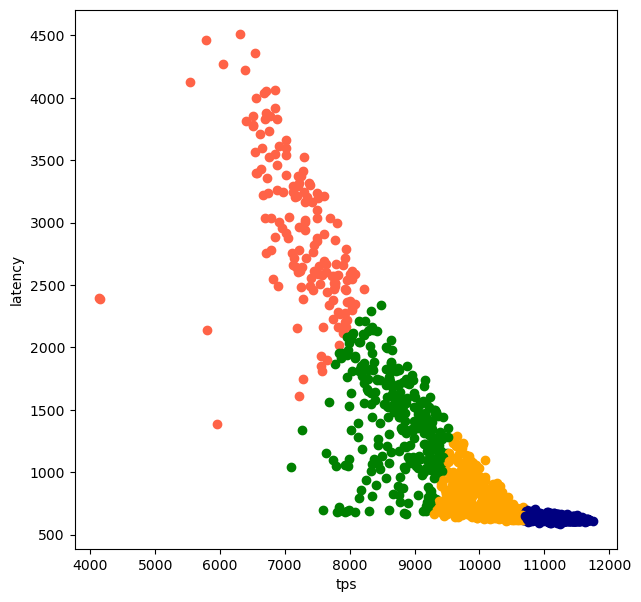

0 :  949
1 :  157
2 :  295
3 :  599
===================6 workload===================


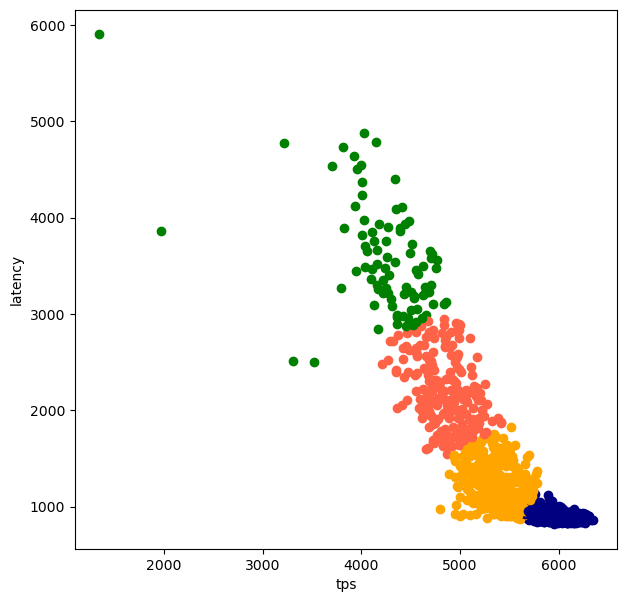

0 : 1246
1 :  219
2 :   89
3 :  446
===================7 workload===================


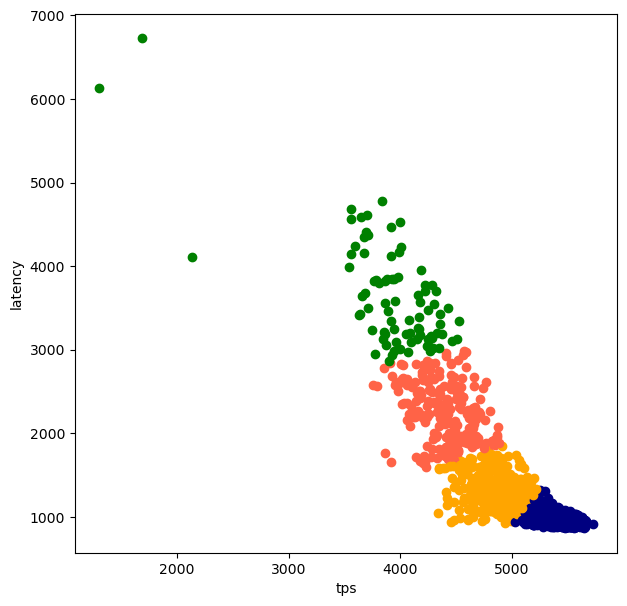

0 : 1248
1 :  227
2 :   84
3 :  441
===================8 workload===================


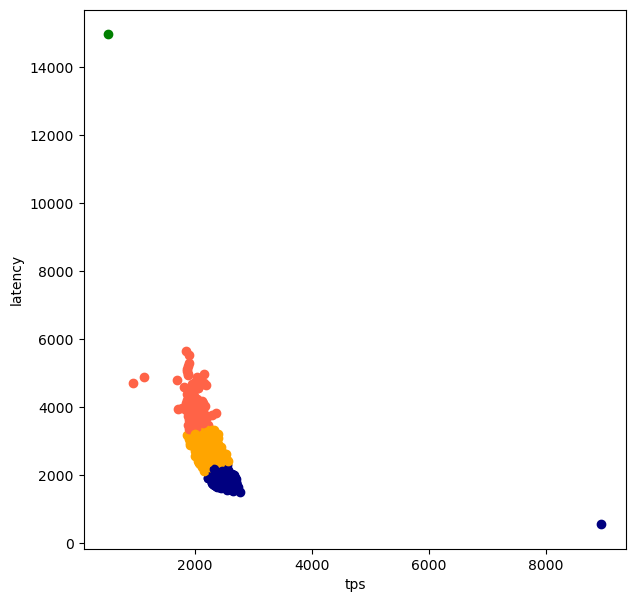

0 : 1671
1 :   99
2 :    1
3 :  229
===================9 workload===================


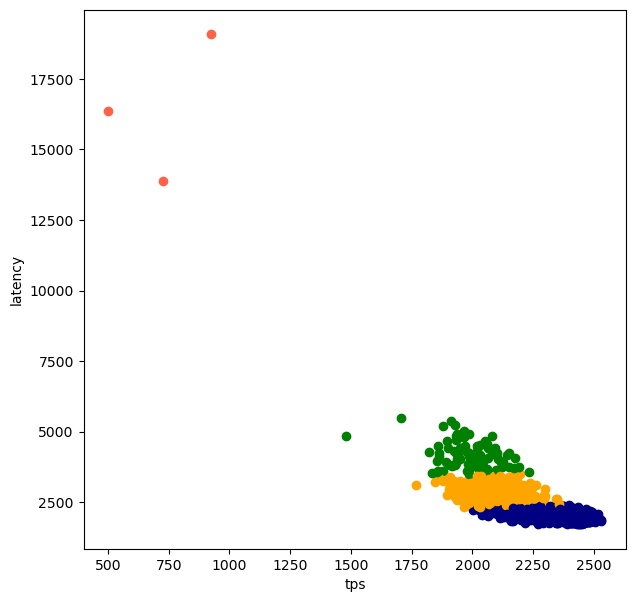

0 : 1668
1 :    3
2 :   84
3 :  245


In [4]:
for wk in range(10):
    print(f'==================={wk} workload===================')
    raw_knobs, external = get_data(KNOB_PATH, EXTERNAL_PATH, wk)
    labels = KmeanClustering(external, 4)
    cls, cnt = np.unique(labels, return_counts=True)
    print(f'{cls[0]} : {cnt[0]:4}\n{cls[1]} : {cnt[1]:4}\n{cls[2]} : {cnt[2]:4}\n{cls[3]} : {cnt[3]:4}')
    #print(f'score = {davies_bouldin_score(raw_knobs, labels)}')
    print(f'==================================================')

In [1]:
!pwd

/home/sein/ksc_model/model


XGBoost Classifier

In [16]:
def get_class_num(data):
    cls, cnt = np.unique(data, return_counts=True)
    print(f'# of the largest class / # of data = {max(cnt) / sum(cnt)}')
    for _ in range(len(cls)):
        print(f'{cls[_]} : {cnt[_]}')

In [10]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

for wk in range(10):
    print(f'=WK{wk}===============================================================')
    raw_knobs, external = get_data(KNOB_PATH, EXTERNAL_PATH, wk)
    np_external = external.to_numpy()
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(np_external)
    labels = kmeans.labels_
    get_class_num(labels)

    X_train, X_test, y_train, y_test = train_test_split(raw_knobs, labels, test_size=0.4, shuffle=True)
    X_scaler = MinMaxScaler().fit(X_train)

    scaled_X_train = X_scaler.transform(X_train)
    scaled_X_test = X_scaler.transform(X_test)

    # clf = xgb.XGBClassifier(n_estimators=50, learning_rate = 0.001, max_depth=14, random_state=0)
    clf = xgb.XGBClassifier(n_estimators=1000, learning_rate = 0.001, n_jobs=-1)
    clf.fit(scaled_X_train, y_train)
    pred = clf.predict(scaled_X_test)
    print('********true********')
    get_class_num(y_test)
    # print(y_test)
    print('********pred********')
    get_class_num(pred)
    # print(pred)
    # print('accuracy: ',clf.score(scaled_X_test, y_test))
    # print('balanced accuracy: ', balanced_accuracy_score(y_test, pred))
    print('f1 score : ',f1_score(y_test, pred, average='weighted'))
    print('precision : ',precision_score(y_test, pred, average='weighted'))
    print('recall : ',recall_score(y_test, pred, average='weighted'))
    print('accuracy: ',clf.score(scaled_X_test, y_test))
    print('balanced accuracy: ', balanced_accuracy_score(y_test, pred))
    

=WK0===============================================================
# of the largest class / # of data = 0.6415
0 : 1283
1 : 12
2 : 612
3 : 93
********true********
# of the largest class / # of data = 0.6725
0 : 538
1 : 4
2 : 230
3 : 28
********pred********
# of the largest class / # of data = 0.69
0 : 552
1 : 5
2 : 217
3 : 26
f1 score :  0.87266164394183
precision :  0.87235257469856
recall :  0.87375
accuracy:  0.87375
balanced accuracy:  0.8922057193654899
=WK1===============================================================
# of the largest class / # of data = 0.523
0 : 824
1 : 122
2 : 1046
3 : 8
********true********
# of the largest class / # of data = 0.52
0 : 325
1 : 55
2 : 416
3 : 4
********pred********
# of the largest class / # of data = 0.595
0 : 260
1 : 63
2 : 476
3 : 1
f1 score :  0.7895930535498636
precision :  0.7982889822595705
recall :  0.795
accuracy:  0.795
balanced accuracy:  0.6888417832167832
=WK2===============================================================
# of t

/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# of the largest class / # of data = 0.8075
0 : 1615
1 : 127
2 : 256
3 : 2
********true********
# of the largest class / # of data = 0.80875
0 : 647
1 : 51
2 : 102
********pred********
# of the largest class / # of data = 0.8225
0 : 658
1 : 47
2 : 94
3 : 1
f1 score :  0.9493791539604348
precision :  0.9493920972644376
recall :  0.95
accuracy:  0.95
balanced accuracy:  0.8558707357234496
=WK4===============================================================


/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2006: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


# of the largest class / # of data = 0.4085
0 : 325
1 : 817
2 : 156
3 : 702
********true********
# of the largest class / # of data = 0.395
0 : 146
1 : 316
2 : 62
3 : 276
********pred********
# of the largest class / # of data = 0.41375
0 : 118
1 : 331
2 : 64
3 : 287
f1 score :  0.7891919407719138
precision :  0.7906240550827832
recall :  0.79125
accuracy:  0.79125
balanced accuracy:  0.7779275896139088
=WK5===============================================================
# of the largest class / # of data = 0.474
0 : 295
1 : 948
2 : 157
3 : 600
********true********
# of the largest class / # of data = 0.46375
0 : 117
1 : 371
2 : 68
3 : 244
********pred********
# of the largest class / # of data = 0.49625
0 : 107
1 : 397
2 : 63
3 : 233
f1 score :  0.7778329212118977
precision :  0.7774165990084174
recall :  0.78
accuracy:  0.78
balanced accuracy:  0.7622087653496288
=WK6===============================================================
# of the largest class / # of data = 0.623
0 : 1246
1 :

/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# of the largest class / # of data = 0.8345
0 : 1669
1 : 3
2 : 84
3 : 244
********true********
# of the largest class / # of data = 0.84125
0 : 673
2 : 41
3 : 86
********pred********
# of the largest class / # of data = 0.84625
0 : 677
2 : 37
3 : 86
f1 score :  0.94599245014245
precision :  0.945984919557667
recall :  0.94625
accuracy:  0.94625
balanced accuracy:  0.8542646615518991


In [57]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


for wk in range(10):
    print(f'=WK{wk}===============================================================')
    raw_knobs, external = get_data(KNOB_PATH, EXTERNAL_PATH, wk)
    np_external = external.to_numpy()
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(np_external)
    labels = kmeans.labels_
    get_class_num(labels)

    X_train, X_test, y_train, y_test = train_test_split(raw_knobs, labels, test_size=0.4, shuffle=True)
    X_scaler = MinMaxScaler().fit(X_train)

    scaled_X_train = X_scaler.transform(X_train)
    scaled_X_test = X_scaler.transform(X_test)

    # clf = xgb.XGBClassifier(n_estimators=50, learning_rate = 0.001, max_depth=14, random_state=0)
    #clf = xgb.XGBClassifier(n_estimators=50, learning_rate = 0.001 ,max_depth=14)
    clf = xgb.XGBClassifier(n_estimators=1000, learning_rate = 0.001, n_jobs=-1)
    clf.fit(scaled_X_train, y_train)
    pred = clf.predict(scaled_X_test)
    print('********true********')
    get_class_num(y_test)
    print('********pred********')
    get_class_num(pred)
    # print('accuracy: ',clf.score(scaled_X_test, y_test))
    # print('f1 score ', f1_score(y_test, pred, average='weighted'))
    # print('balanced accuracy: ', balanced_accuracy_score(y_test, pred))
    print('f1 score : ',f1_score(y_test, pred, average='weighted'))
    print('precision : ',precision_score(y_test, pred, average='weighted'))
    print('recall : ',recall_score(y_test, pred, average='weighted'))
    print('accuracy: ',clf.score(scaled_X_test, y_test))
    print('balanced accuracy: ', balanced_accuracy_score(y_test, pred))
    

=WK0===============================================================
# of the largest class / # of data = 0.844
0 : 1688
1 : 296
2 : 16
********true********
# of the largest class / # of data = 0.8225
0 : 658
1 : 135
2 : 7
********pred********
# of the largest class / # of data = 0.8575
0 : 686
1 : 105
2 : 9
f1 score :  0.9357812500000001
precision :  0.9380300453514739
recall :  0.93875
accuracy:  0.93875
balanced accuracy:  0.8986378475740179
=WK1===============================================================
# of the largest class / # of data = 0.925
0 : 1850
1 : 142
2 : 8
********true********
# of the largest class / # of data = 0.91
0 : 728
1 : 72
********pred********
# of the largest class / # of data = 0.9075
0 : 726
1 : 71
2 : 3
f1 score :  0.9792939660064832
precision :  0.9810992123540139
recall :  0.9775
accuracy:  0.9775
balanced accuracy:  0.9375763125763126
=WK2===============================================================


/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2006: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


# of the largest class / # of data = 0.8855
0 : 1771
1 : 227
2 : 2
********true********
# of the largest class / # of data = 0.88125
0 : 705
1 : 94
2 : 1
********pred********
# of the largest class / # of data = 0.87875
0 : 703
1 : 97
f1 score :  0.9720616205824608
precision :  0.9716783556481061
recall :  0.9725
accuracy:  0.9725
balanced accuracy:  0.6290780141843971
=WK3===============================================================


/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# of the largest class / # of data = 0.819
0 : 249
1 : 1638
2 : 113
********true********
# of the largest class / # of data = 0.82375
0 : 96
1 : 659
2 : 45
********pred********
# of the largest class / # of data = 0.825
0 : 98
1 : 660
2 : 42
f1 score :  0.9436368161791876
precision :  0.943648964131107
recall :  0.94375
accuracy:  0.94375
balanced accuracy:  0.8390262322261565
=WK4===============================================================
# of the largest class / # of data = 0.599
0 : 1198
1 : 266
2 : 536
********true********
# of the largest class / # of data = 0.61625
0 : 493
1 : 111
2 : 196
********pred********
# of the largest class / # of data = 0.635
0 : 508
1 : 106
2 : 186
f1 score :  0.8673519564374149
precision :  0.8665816853253204
recall :  0.86875
accuracy:  0.86875
balanced accuracy:  0.8310500652575413
=WK5===============================================================
# of the largest class / # of data = 0.676
0 : 1352
1 : 201
2 : 447
********true********
# of the l

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

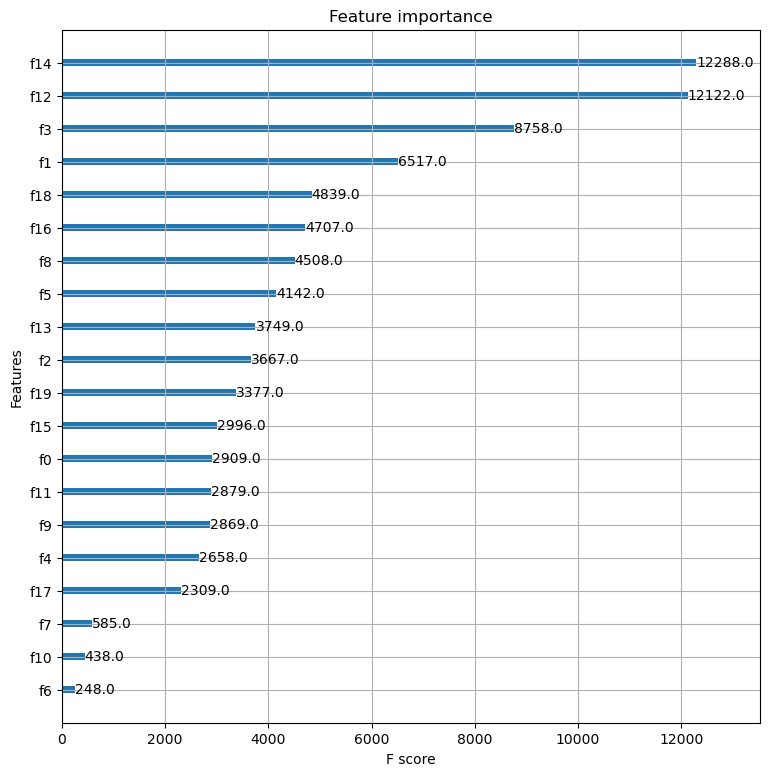

In [35]:
#feature importance

from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(9,9))
plot_importance (clf, ax)

In [27]:
#### parmeter tuning ###

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import KFold

xgb = XGBClassifier()

xgb_param_grid = {
    # "n_estimators" : [100, 200, 300, 400, 500],
    # "learning_rate" : [0.001, 0.005, 0.0001, 0.0005],
    # "max_depth" : [4, 6, 8, 10, 12]
    "n_estimators" : [1000, 1500, 2000],
    "learning_rate" : [0.001, 0.005],
    "max_depth" : [6,7,8,9,10,11,12],
    "max_leaves" : [255,300]
}

# cv=KFold(n_splits=6, random_state = 1)

xgb_grid = GridSearchCV(estimator = xgb, param_grid = xgb_param_grid, scoring = "accuracy"
                        , cv=3) #n_jobs = -1, verbose = 1)

# clf_grid.fit(scaled_X_train, y_train)
xgb_grid.fit(scaled_X_train, y_train)
# print('XGB 예측 정확도: {:.4f}'.format(xgb_grid.best_score_))
print(xgb_grid.best_params_)


/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


{'learning_rate': 0.005, 'max_depth': 6, 'max_leaves': 255, 'n_estimators': 1500}


In [16]:
###with tuned parameter K = 4

import xgboost as xgb
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

for wk in range(10):
    print(f'=WK{wk}===============================================================')
    raw_knobs, external = get_data(KNOB_PATH, EXTERNAL_PATH, wk)
    np_external = external.to_numpy()
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(np_external)
    labels = kmeans.labels_
    get_class_num(labels)

    X_train, X_test, y_train, y_test = train_test_split(raw_knobs, labels, test_size=0.4, shuffle=True)
    X_scaler = MinMaxScaler().fit(X_train)

    scaled_X_train = X_scaler.transform(X_train)
    scaled_X_test = X_scaler.transform(X_test)

    # clf = xgb.XGBClassifier(n_estimators=50, learning_rate = 0.001, max_depth=14, random_state=0)
    clf = xgb.XGBClassifier( n_estimators=1500, max_depth = 12, 
                            learning_rate = 0.001)
    #1 tree_method = 'exacnt', n_estimators = 1000, max_depth = 14, learning_rate = 0.0001
    #2 tree_method= 'exact', n_estimators=1500, max_depth = 10, learning_rate = 0.001
    #3 tree_method = 'exact', n_estimators = 1500, max_depth = 12, learning_rate = 0.001
    
    clf.fit(scaled_X_train, y_train)
    pred = clf.predict(scaled_X_test)
    print('********true********')
    get_class_num(y_test)
    print('********pred********')
    get_class_num(pred)
    # print('accuracy: ',clf.score(scaled_X_test, y_test))
    # print('balanced accuracy: ', balanced_accuracy_score(y_test, pred))
    print('f1 score : ',f1_score(y_test, pred, average='weighted'))
    print('precision : ',precision_score(y_test, pred, average='weighted'))
    print('recall : ',recall_score(y_test, pred, average='weighted'))
    print('accuracy: ',clf.score(scaled_X_test, y_test))
    print('balanced accuracy: ', balanced_accuracy_score(y_test, pred))
    

=WK0===============================================================
# of the largest class / # of data = 0.6415
0 : 612
1 : 1283
2 : 12
3 : 93
********true********
# of the largest class / # of data = 0.64875
0 : 230
1 : 519
2 : 6
3 : 45
********pred********
# of the largest class / # of data = 0.6675
0 : 215
1 : 534
2 : 4
3 : 47
f1 score :  0.8624204191179642
precision :  0.8623758853665724
recall :  0.86375
accuracy:  0.86375
balanced accuracy:  0.7888239647035826
=WK1===============================================================
# of the largest class / # of data = 0.53
0 : 1060
1 : 122
2 : 810
3 : 8
********true********
# of the largest class / # of data = 0.53
0 : 424
1 : 48
2 : 325
3 : 3
********pred********
# of the largest class / # of data = 0.5475
0 : 438
1 : 52
2 : 306
3 : 4
f1 score :  0.7589370221675693
precision :  0.7588327259688561
recall :  0.76
accuracy:  0.76
balanced accuracy:  0.6933883647798743
=WK2===============================================================
#

/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# of the largest class / # of data = 0.813
0 : 254
1 : 1626
2 : 119
3 : 1
********true********
# of the largest class / # of data = 0.82
0 : 105
1 : 656
2 : 39
********pred********
# of the largest class / # of data = 0.84125
0 : 91
1 : 673
2 : 36
f1 score :  0.9430905299365796
precision :  0.9426238355812093
recall :  0.945
accuracy:  0.945
balanced accuracy:  0.8520812859227495
=WK4===============================================================
# of the largest class / # of data = 0.41
0 : 703
1 : 820
2 : 323
3 : 154
********true********
# of the largest class / # of data = 0.4225
0 : 277
1 : 338
2 : 126
3 : 59
********pred********
# of the largest class / # of data = 0.40625
0 : 301
1 : 325
2 : 121
3 : 53
f1 score :  0.7714206089526785
precision :  0.774411530694763
recall :  0.77
accuracy:  0.77
balanced accuracy:  0.7605896974298643
=WK5===============================================================
# of the largest class / # of data = 0.474
0 : 600
1 : 157
2 : 948
3 : 295
*******

/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2006: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [9]:
###with tuned parameter K = 3

import xgboost as xgb
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

for wk in range(10):
    print(f'=WK{wk}===============================================================')
    raw_knobs, external = get_data(KNOB_PATH, EXTERNAL_PATH, wk)
    np_external = external.to_numpy()
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(np_external)
    labels = kmeans.labels_
    get_class_num(labels)

    X_train, X_test, y_train, y_test = train_test_split(raw_knobs, labels, test_size=0.4, shuffle=True)
    X_scaler = MinMaxScaler().fit(X_train)

    scaled_X_train = X_scaler.transform(X_train)
    scaled_X_test = X_scaler.transform(X_test)

    # clf = xgb.XGBClassifier(n_estimators=50, learning_rate = 0.001, max_depth=14, random_state=0)
    clf = xgb.XGBClassifier(n_estimators=1000, max_depth = 10, learning_rate = 0.001)
    #1 tree_method = 'exacnt', n_estimators = 1000, max_depth = 14, learning_rate = 0.0001
    #2 tree_method= 'exact', n_estimators=1500, max_depth = 10, learning_rate = 0.001
    #3 tree_method = 'exact', n_estimators = 1500, max_depth = 12, learning_rate = 0.001
    #4 tree_method= 'exact', n_estimators=1500, max_depth = 10, learning_rate = 0.001
    #5 tree_method= 'exact', n_estimators=1000, max_depth = 10, learning_rate = 0.001
    
    clf.fit(scaled_X_train, y_train)
    pred = clf.predict(scaled_X_test)
    print('********true********')
    get_class_num(y_test)
    print('********pred********')
    get_class_num(pred)
    # print('accuracy: ',clf.score(scaled_X_test, y_test))
    # print('balanced accuracy: ', balanced_accuracy_score(y_test, pred))
    print('f1 score : ',f1_score(y_test, pred, average='weighted'))
    print('precision : ',precision_score(y_test, pred, average='weighted'))
    print('recall : ',recall_score(y_test, pred, average='weighted'))
    print('accuracy: ',clf.score(scaled_X_test, y_test))
    print('balanced accuracy: ', balanced_accuracy_score(y_test, pred))
    

=WK0===============================================================
# of the largest class / # of data = 0.844
0 : 1688
1 : 296
2 : 16
********true********
# of the largest class / # of data = 0.83625
0 : 669
1 : 122
2 : 9
********pred********
# of the largest class / # of data = 0.85
0 : 680
1 : 111
2 : 9
f1 score :  0.9159133454442488
precision :  0.9149237877583465
recall :  0.9175
accuracy:  0.9175
balanced accuracy:  0.8456849115527348
=WK1===============================================================
# of the largest class / # of data = 0.925
0 : 1850
1 : 142
2 : 8
********true********
# of the largest class / # of data = 0.92875
0 : 743
1 : 54
2 : 3
********pred********
# of the largest class / # of data = 0.92875
0 : 743
1 : 56
2 : 1
f1 score :  0.9801363636363637
precision :  0.9790625
recall :  0.98125
accuracy:  0.98125
balanced accuracy:  0.6326620474220295
=WK2===============================================================
# of the largest class / # of data = 0.8855
0 : 1

In [39]:
#####parameter with GridSearch

import xgboost as xgb
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


for wk in range(10):
    print(f'=WK{wk}===============================================================')
    raw_knobs, external = get_data(KNOB_PATH, EXTERNAL_PATH, wk)
    np_external = external.to_numpy()
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(np_external)
    labels = kmeans.labels_
    get_class_num(labels)

    X_train, X_test, y_train, y_test = train_test_split(raw_knobs, labels, test_size=0.4, shuffle=True)
    X_scaler = MinMaxScaler().fit(X_train)

    scaled_X_train = X_scaler.transform(X_train)
    scaled_X_test = X_scaler.transform(X_test)

    # clf = xgb.XGBClassifier(n_estimators=50, learning_rate = 0.001, max_depth=14, random_state=0)
    #clf = xgb.XGBClassifier(n_estimators=50, learning_rate = 0.001 ,max_depth=14)
    clf = xgb.XGBClassifier(n_estimators=1500, learning_rate = 0.005, 
                            max_depth = 6, max_leaves = 255, n_jobs=-1)
    clf.fit(scaled_X_train, y_train)
    pred = clf.predict(scaled_X_test)
    print('********true********')
    get_class_num(y_test)
    print('********pred********')
    get_class_num(pred)
    # print('accuracy: ',clf.score(scaled_X_test, y_test))
    # print('f1 score ', f1_score(y_test, pred, average='weighted'))
    # print('balanced accuracy: ', balanced_accuracy_score(y_test, pred))
    print('f1 score : ',f1_score(y_test, pred, average='weighted'))
    print('precision : ',precision_score(y_test, pred, average='weighted'))
    print('recall : ',recall_score(y_test, pred, average='weighted'))
    print('accuracy: ',clf.score(scaled_X_test, y_test))
    print('balanced accuracy: ', balanced_accuracy_score(y_test, pred))
    

=WK0===============================================================
# of the largest class / # of data = 0.844
0 : 1688
1 : 296
2 : 16
********true********
# of the largest class / # of data = 0.84
0 : 672
1 : 121
2 : 7
********pred********
# of the largest class / # of data = 0.84
0 : 672
1 : 121
2 : 7
f1 score :  0.95
precision :  0.95
recall :  0.95
accuracy:  0.95
balanced accuracy:  0.9349829463465827
=WK1===============================================================
# of the largest class / # of data = 0.925
0 : 1850
1 : 142
2 : 8
********true********
# of the largest class / # of data = 0.93
0 : 744
1 : 54
2 : 2
********pred********
# of the largest class / # of data = 0.92125
0 : 737
1 : 61
2 : 2
f1 score :  0.98288007515486
precision :  0.9837553662388504
recall :  0.9825
accuracy:  0.9825
balanced accuracy:  0.6498407009159698
=WK2===============================================================
# of the largest class / # of data = 0.8855
0 : 1771
1 : 227
2 : 2
********true***

/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# of the largest class / # of data = 0.818
0 : 1636
1 : 115
2 : 249
********true********
# of the largest class / # of data = 0.81875
0 : 655
1 : 53
2 : 92
********pred********
# of the largest class / # of data = 0.81375
0 : 651
1 : 39
2 : 110
f1 score :  0.9541910980414906
precision :  0.9587548849000461
recall :  0.95375
accuracy:  0.95375
balanced accuracy:  0.8664359056248916
=WK4===============================================================
# of the largest class / # of data = 0.599
0 : 1198
1 : 266
2 : 536
********true********
# of the largest class / # of data = 0.61625
0 : 493
1 : 95
2 : 212
********pred********
# of the largest class / # of data = 0.62875
0 : 503
1 : 102
2 : 195
f1 score :  0.878686303633822
precision :  0.8784461027949948
recall :  0.88
accuracy:  0.88
balanced accuracy:  0.8452474329457154
=WK5===============================================================
# of the largest class / # of data = 0.676
0 : 1352
1 : 201
2 : 447
********true********
# of the lar

/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
###SMOTE

import xgboost as xgb
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE

for wk in range(10):
    print(f'=WK{wk}===============================================================')
    raw_knobs, external = get_data(KNOB_PATH, EXTERNAL_PATH, wk)
    np_external = external.to_numpy()
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(np_external)
    labels = kmeans.labels_
    get_class_num(labels)

    X_train, X_test, y_train, y_test = train_test_split(raw_knobs, labels, test_size=0.4, shuffle=True)
    X_scaler = MinMaxScaler().fit(X_train)

    scaled_X_train = X_scaler.transform(X_train)
    scaled_X_test = X_scaler.transform(X_test)
    # print(type(scaled_X_train))
    # print(type(y_train))
    # quit()
    #print('before over sampling :', scaled_X_train.shape,y_train.shape)
    
    smote = SMOTE(random_state = 0, k_neighbors=1 )
    X_tr_over, y_tr_over = smote.fit_resample(scaled_X_train,y_train)
    #print('after over sampling lable :', X_tr_over.shape,y_tr_over.shape)
    
    # clf = xgb.XGBClassifier(n_estimators=50, learning_rate = 0.001, max_depth=14, random_state=0)
    #clf = xgb.XGBClassifier(n_estimators=50, learning_rate = 0.001 ,max_depth=14)
    # clf = xgb.XGBClassifier(n_estimators=1000, learning_rate = 0.001, n_jobs=-1)
    clf = xgb.XGBClassifier(n_estimators=1500, learning_rate = 0.005, 
                            max_depth = 6, max_leaves = 255, n_jobs=-1)
    clf.fit(X_tr_over, y_tr_over)
    pred = clf.predict(scaled_X_test)
    print('********true********')
    get_class_num(y_test)
    print('********pred********')
    get_class_num(pred)
    # print('accuracy: ',clf.score(scaled_X_test, y_test))
    # print('f1 score ', f1_score(y_test, pred, average='weighted'))
    # print('balanced accuracy: ', balanced_accuracy_score(y_test, pred))
    print('f1 score : ',f1_score(y_test, pred, average='weighted'))
    print('precision : ',precision_score(y_test, pred, average='weighted'))
    print('recall : ',recall_score(y_test, pred, average='weighted'))
    print('accuracy: ',clf.score(scaled_X_test, y_test))
    print('balanced accuracy: ', balanced_accuracy_score(y_test, pred))
    

=WK0===============================================================
# of the largest class / # of data = 0.844
0 : 296
1 : 1688
2 : 16
********true********
# of the largest class / # of data = 0.84125
0 : 118
1 : 673
2 : 9
********pred********
# of the largest class / # of data = 0.83375
0 : 127
1 : 667
2 : 6
f1 score :  0.9271447989643617
precision :  0.9273876152474944
recall :  0.9275
accuracy:  0.9275
balanced accuracy:  0.6665598658320345
=WK1===============================================================
# of the largest class / # of data = 0.925
0 : 1850
1 : 142
2 : 8
********true********
# of the largest class / # of data = 0.91875
0 : 735
1 : 65
********pred********
# of the largest class / # of data = 0.90625
0 : 725
1 : 69
2 : 6
f1 score :  0.9702991463913311
precision :  0.9745540979510244
recall :  0.96625
accuracy:  0.96625
balanced accuracy:  0.9185243328100472
=WK2===============================================================


/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2006: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


# of the largest class / # of data = 0.8855
0 : 227
1 : 1771
2 : 2
********true********
# of the largest class / # of data = 0.8875
0 : 88
1 : 710
2 : 2
********pred********
# of the largest class / # of data = 0.89
0 : 88
1 : 712
f1 score :  0.9737675808720112
precision :  0.9725386235955057
recall :  0.975
accuracy:  0.975
balanced accuracy:  0.6283504054630815
=WK3===============================================================


/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# of the largest class / # of data = 0.817
0 : 251
1 : 115
2 : 1634
********true********
# of the largest class / # of data = 0.8175
0 : 100
1 : 46
2 : 654
********pred********
# of the largest class / # of data = 0.81875
0 : 110
1 : 35
2 : 655
f1 score :  0.9496999877392034
precision :  0.9515735104590067
recall :  0.95
accuracy:  0.95
balanced accuracy:  0.8457678500199441
=WK4===============================================================
# of the largest class / # of data = 0.599
0 : 536
1 : 1198
2 : 266
********true********
# of the largest class / # of data = 0.60875
0 : 212
1 : 487
2 : 101
********pred********
# of the largest class / # of data = 0.6
0 : 228
1 : 480
2 : 92
f1 score :  0.8847508637608192
precision :  0.8868394236270024
recall :  0.88375
accuracy:  0.88375
balanced accuracy:  0.8555205119520126
=WK5===============================================================
# of the largest class / # of data = 0.676
0 : 1352
1 : 201
2 : 447
********true********
# of the larges

/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# of the largest class / # of data = 0.8935
0 : 1787
1 : 3
2 : 210
********true********
# of the largest class / # of data = 0.89125
0 : 713
1 : 1
2 : 86
********pred********
# of the largest class / # of data = 0.88875
0 : 711
1 : 1
2 : 88
f1 score :  0.9577144073679452
precision :  0.9579551048459275
recall :  0.9575
accuracy:  0.9575
balanced accuracy:  0.9295693488589539


In [13]:
#### parmeter tuning with RandomSearch###

#### parmeter tuning ###

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import KFold

xgb = XGBClassifier()

xgb_param_rand = {
    # "n_estimators" : [100, 200, 300, 400, 500],
    # "learning_rate" : [0.001, 0.005, 0.0001, 0.0005],
    # "max_depth" : [4, 6, 8, 10, 12]
    "n_estimators" : [1000, 1500, 2000],
    "learning_rate" : [0.001, 0.005],
    "max_depth" : [6,7,8,9,10,11,12],
    "max_leaves" : [255,300]
}

# cv=KFold(n_splits=6, random_state = 1)

xgb_rand = RandomizedSearchCV(estimator = xgb, param_distributions= xgb_param_rand, scoring = "accuracy"
                        , cv=3) #n_jobs = -1, verbose = 1)

# clf_grid.fit(scaled_X_train, y_train)
xgb_rand.fit(scaled_X_train, y_train)
# print('XGB 예측 정확도: {:.4f}'.format(xgb_grid.best_score_))
print(xgb_rand.best_params_)


/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


{'n_estimators': 2000, 'max_leaves': 255, 'max_depth': 7, 'learning_rate': 0.005}


In [14]:
#####parameter with RandomSearch

import xgboost as xgb
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


for wk in range(10):
    print(f'=WK{wk}===============================================================')
    raw_knobs, external = get_data(KNOB_PATH, EXTERNAL_PATH, wk)
    np_external = external.to_numpy()
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(np_external)
    labels = kmeans.labels_
    get_class_num(labels)

    X_train, X_test, y_train, y_test = train_test_split(raw_knobs, labels, test_size=0.4, shuffle=True)
    X_scaler = MinMaxScaler().fit(X_train)

    scaled_X_train = X_scaler.transform(X_train)
    scaled_X_test = X_scaler.transform(X_test)

    # clf = xgb.XGBClassifier(n_estimators=50, learning_rate = 0.001, max_depth=14, random_state=0)
    #clf = xgb.XGBClassifier(n_estimators=50, learning_rate = 0.001 ,max_depth=14)
    clf = xgb.XGBClassifier(n_estimators=2000, learning_rate = 0.005, 
                            max_depth = 7, max_leaves = 255, n_jobs=-1)
    clf.fit(scaled_X_train, y_train)
    pred = clf.predict(scaled_X_test)
    print('********true********')
    get_class_num(y_test)
    print('********pred********')
    get_class_num(pred)
    # print('accuracy: ',clf.score(scaled_X_test, y_test))
    # print('f1 score ', f1_score(y_test, pred, average='weighted'))
    # print('balanced accuracy: ', balanced_accuracy_score(y_test, pred))
    print('f1 score : ',f1_score(y_test, pred, average='weighted'))
    print('precision : ',precision_score(y_test, pred, average='weighted'))
    print('recall : ',recall_score(y_test, pred, average='weighted'))
    print('accuracy: ',clf.score(scaled_X_test, y_test))
    print('balanced accuracy: ', balanced_accuracy_score(y_test, pred))
    

=WK0===============================================================
# of the largest class / # of data = 0.844
0 : 1688
1 : 296
2 : 16
********true********
# of the largest class / # of data = 0.8525
0 : 682
1 : 111
2 : 7
********pred********
# of the largest class / # of data = 0.86875
0 : 695
1 : 101
2 : 4
f1 score :  0.9536927956653725
precision :  0.9540760025642853
recall :  0.955
accuracy:  0.955
balanced accuracy:  0.7857004469907696
=WK1===============================================================
# of the largest class / # of data = 0.925
0 : 1850
1 : 8
2 : 142
********true********
# of the largest class / # of data = 0.9225
0 : 738
1 : 4
2 : 58
********pred********
# of the largest class / # of data = 0.93125
0 : 745
2 : 55
f1 score :  0.9748012579141776
precision :  0.9722318486882244
recall :  0.9775
accuracy:  0.9775
balanced accuracy:  0.6126841728187397
=WK2===============================================================


/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# of the largest class / # of data = 0.8855
0 : 1771
1 : 227
2 : 2
********true********
# of the largest class / # of data = 0.9
0 : 720
1 : 79
2 : 1
********pred********
# of the largest class / # of data = 0.89875
0 : 719
1 : 81
f1 score :  0.9782426164002781
precision :  0.9777638695719362
recall :  0.97875
accuracy:  0.97875
balanced accuracy:  0.632964135021097
=WK3===============================================================


/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# of the largest class / # of data = 0.817
0 : 115
1 : 1634
2 : 251
********true********
# of the largest class / # of data = 0.81875
0 : 50
1 : 655
2 : 95
********pred********
# of the largest class / # of data = 0.83
0 : 47
1 : 664
2 : 89
f1 score :  0.946612885357576
precision :  0.9461040649869379
recall :  0.9475
accuracy:  0.9475
balanced accuracy:  0.8665247087183608
=WK4===============================================================
# of the largest class / # of data = 0.599
0 : 536
1 : 1198
2 : 266
********true********
# of the largest class / # of data = 0.57375
0 : 225
1 : 459
2 : 116
********pred********
# of the largest class / # of data = 0.59875
0 : 209
1 : 479
2 : 112
f1 score :  0.8682850331172176
precision :  0.8677131946039895
recall :  0.87
accuracy:  0.87
balanced accuracy:  0.8412606115243033
=WK5===============================================================
# of the largest class / # of data = 0.676
0 : 447
1 : 201
2 : 1352
********true********
# of the largest 

/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# of the largest class / # of data = 0.8935
0 : 1787
1 : 3
2 : 210
********true********
# of the largest class / # of data = 0.89625
0 : 717
1 : 1
2 : 82
********pred********
# of the largest class / # of data = 0.905
0 : 724
2 : 76
f1 score :  0.962548489533464
precision :  0.9616320151206746
recall :  0.96375
accuracy:  0.96375
balanced accuracy:  0.592447075098366


/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
###XGBoost with tuned parameter by GridSearch, K=4

import xgboost as xgb
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE

for wk in range(10):
    print(f'=WK{wk}===============================================================')
    raw_knobs, external = get_data(KNOB_PATH, EXTERNAL_PATH, wk)
    np_external = external.to_numpy()
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(np_external)
    labels = kmeans.labels_
    get_class_num(labels)

    X_train, X_test, y_train, y_test = train_test_split(raw_knobs, labels, test_size=0.4, shuffle=True)
    X_scaler = MinMaxScaler().fit(X_train)

    scaled_X_train = X_scaler.transform(X_train)
    scaled_X_test = X_scaler.transform(X_test)
    # print(type(scaled_X_train))
    # print(type(y_train))
    # quit()
    #print('before over sampling :', scaled_X_train.shape,y_train.shape)
    
    # smote = SMOTE(random_state = 42, k_neighbors=1 )
    # X_tr_over, y_tr_over = smote.fit_resample(scaled_X_train,y_train)
    #print('after over sampling lable :', X_tr_over.shape,y_tr_over.shape)
    
    # clf = xgb.XGBClassifier(n_estimators=50, learning_rate = 0.001, max_depth=14, random_state=0)
    #clf = xgb.XGBClassifier(n_estimators=50, learning_rate = 0.001 ,max_depth=14)
    # clf = xgb.XGBClassifier(n_estimators=1000, learning_rate = 0.001, n_jobs=-1)
    clf = xgb.XGBClassifier(n_estimators=1500, learning_rate = 0.005, 
                            max_depth = 6, max_leaves = 255, n_jobs=-1)
    clf.fit(scaled_X_train, y_train)
    pred = clf.predict(scaled_X_test)
    print('********true********')
    get_class_num(y_test)
    print('********pred********')
    get_class_num(pred)
    # print('accuracy: ',clf.score(scaled_X_test, y_test))
    # print('f1 score ', f1_score(y_test, pred, average='weighted'))
    # print('balanced accuracy: ', balanced_accuracy_score(y_test, pred))
    print('f1 score : ',f1_score(y_test, pred, average='weighted'))
    print('precision : ',precision_score(y_test, pred, average='weighted'))
    print('recall : ',recall_score(y_test, pred, average='weighted'))
    print('accuracy: ',clf.score(scaled_X_test, y_test))
    print('balanced accuracy: ', balanced_accuracy_score(y_test, pred))
    

=WK0===============================================================
# of the largest class / # of data = 0.6415
0 : 1283
1 : 12
2 : 612
3 : 93
********true********
# of the largest class / # of data = 0.63875
0 : 511
1 : 7
2 : 245
3 : 37
********pred********
# of the largest class / # of data = 0.69875
0 : 559
1 : 3
2 : 205
3 : 33
f1 score :  0.8785376798694555
precision :  0.8831243595693397
recall :  0.8825
accuracy:  0.8825
balanced accuracy:  0.7289764184089037
=WK1===============================================================
# of the largest class / # of data = 0.524
0 : 822
1 : 122
2 : 8
3 : 1048
********true********
# of the largest class / # of data = 0.5075
0 : 329
1 : 61
2 : 4
3 : 406
********pred********
# of the largest class / # of data = 0.5375
0 : 306
1 : 63
2 : 1
3 : 430
f1 score :  0.7973428988628313
precision :  0.7962232454997503
recall :  0.8
accuracy:  0.8
balanced accuracy:  0.6305227568337511
=WK2===============================================================
#

/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# of the largest class / # of data = 0.814
0 : 1628
1 : 119
2 : 251
3 : 2
********true********
# of the largest class / # of data = 0.82125
0 : 657
1 : 54
2 : 89
********pred********
# of the largest class / # of data = 0.82625
0 : 661
1 : 39
2 : 100
f1 score :  0.9536255325904842
precision :  0.9571483358547656
recall :  0.95375
accuracy:  0.95375
balanced accuracy:  0.8541520587849663
=WK4===============================================================
# of the largest class / # of data = 0.407
0 : 701
1 : 156
2 : 814
3 : 329
********true********
# of the largest class / # of data = 0.38875
0 : 288
1 : 66
2 : 311
3 : 135
********pred********
# of the largest class / # of data = 0.395
0 : 289
1 : 61
2 : 316
3 : 134
f1 score :  0.8386772353772751
precision :  0.8388797836869493
recall :  0.83875
accuracy:  0.83875
balanced accuracy:  0.8273636350103392
=WK5===============================================================
# of the largest class / # of data = 0.475
0 : 157
1 : 950
2 : 598
3

/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#linear model의 input = scaled_X_test
#linear model의 output = pred = clf.predic(scaled_X_test)
#총 두 개의 linear model을 만들어야함
#그런데 복잡한 train, test가 있는 모델이 아닌 가볍게 linear하게 변경해주는
